In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

In [2]:
digits = load_digits()
X, y = digits.data, digits.target

In [3]:
# Create range of values for parameter

param_range = np.arange(1, 250, 2)

train_scores, test_scores = validation_curve(RandomForestClassifier(),
                                            X,
                                            y,
                                            param_name = 'n_estimators',
                                            param_range = param_range,
                                            cv = 3,
                                            scoring = 'accuracy',
                                            n_jobs = -1)

In [4]:
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

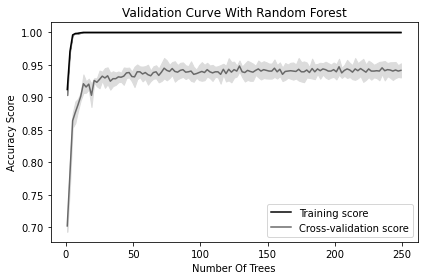

In [15]:
plt.plot(param_range, train_mean, label = 'Training score', color = 'black')
plt.plot(param_range, test_mean, label = 'Cross-validation score', color = 'dimgrey')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color = 'gray')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color = 'gainsboro')

plt.title('Validation Curve With Random Forest')
plt.xlabel('Number Of Trees')
plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()